<a href="https://colab.research.google.com/github/RoseDanjuma/PINN-Heat-Equation/blob/main/UQ_Logistic_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uncertainty Quantification (UQ) and Inverse Problems
This notebook demonstrates UQ using Monte Carlo simulation and an inverse problem using parameter estimation in a logistic growth model.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Logistic Growth Model

Equation:

𝑃
(
𝑡
) =
\\frac {𝐾} {1
+
(
\frac{𝐾
−
𝑃
_0} {𝑃
_0}
)
^𝑒
−
𝑟
𝑡}

In [3]:
def logistic(t, r, K=100, P0=10):
    return K / (1 + ((K-P0)/P0) * np.exp(-r*t))

# Uncertainty Quantification with Monte Carlo

We’ll assume r is uncertain (around 0.3 ± 0.05).

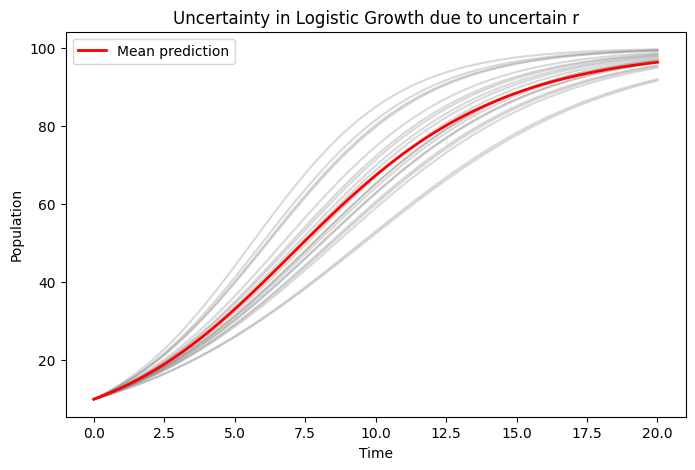

In [4]:
# Time
t = np.linspace(0, 20, 100)

# Monte Carlo simulation
N = 200   # number of samples
r_samples = np.random.normal(0.3, 0.05, N)

populations = []
for r in r_samples:
    populations.append(logistic(t, r))
populations = np.array(populations)

# Plot
plt.figure(figsize=(8,5))
for i in range(20):  # plot 20 sample curves
    plt.plot(t, populations[i], color='gray', alpha=0.3)
plt.plot(t, np.mean(populations, axis=0), 'r', lw=2, label="Mean prediction")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Uncertainty in Logistic Growth due to uncertain r")
plt.legend()
plt.show()

#Inverse Problem (Parameter Estimation)

Now pretend we only observe noisy data, and we want to estimate r.

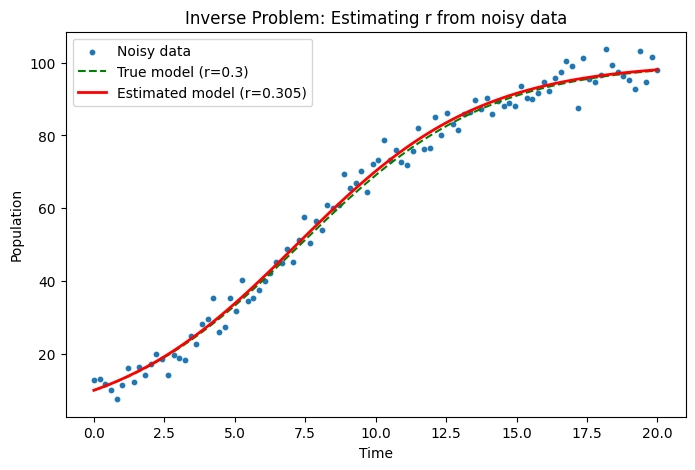

In [5]:
# Generate noisy observations
true_r = 0.3
obs = logistic(t, true_r) + np.random.normal(0, 3, len(t))

# Fit logistic curve to noisy data
def fit_func(t, r):
    return logistic(t, r)

popt, pcov = curve_fit(fit_func, t, obs, p0=[0.2])
r_est = popt[0]

# Plot
plt.figure(figsize=(8,5))
plt.scatter(t, obs, s=10, label="Noisy data")
plt.plot(t, logistic(t, true_r), 'g--', label="True model (r=0.3)")
plt.plot(t, logistic(t, r_est), 'r', lw=2, label=f"Estimated model (r={r_est:.3f})")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Inverse Problem: Estimating r from noisy data")
plt.legend()
plt.show()